In [2]:
# Import PointMeasurements
from snowexsql.api import PointMeasurements
import geopandas as gpd
geom_dir = '~/shared-public/swesarr_project/base-layers/swesarr-roi.shp'
geom = gpd.read_file(geom_dir)
geom = geom.to_crs('epsg:26912')
df = PointMeasurements.from_area(
    type="swe",
    shp=geom.iloc[0].geometry,
    instrument='pulse EKKO Pro multi-polarization 1 GHz GPR',
    limit = 1000000,
)


df


,version_number,equipment,value,latitude,longitude,northing,easting,elevation,utm_zone,geom,...,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,observers
0,None,None,206.164258,39.021122,-108.205375,4.322837e+06,741939.604028,None,12,POINT (741939.604 4322837.11),...,2020-01-29,2022-07-05 16:50:30.058972+00:00,None,3116882,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Tate Meehan
1,None,None,206.164258,39.021123,-108.205376,4.322837e+06,741939.547028,None,12,POINT (741939.547 4322837.118),...,2020-01-29,2022-07-05 16:50:30.058972+00:00,None,3116883,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Tate Meehan
2,None,None,199.513799,39.021124,-108.205351,4.322837e+06,741941.641028,None,12,POINT (741941.641 4322837.344),...,2020-01-29,2022-07-05 16:50:30.058972+00:00,None,3116822,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Tate Meehan
3,None,None,199.513799,39.021124,-108.205351,4.322837e+06,741941.627028,None,12,POINT (741941.627 4322837.338),...,2020-01-29,2022-07-05 16:50:30.058972+00:00,None,3116823,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Tate Meehan
4,None,None,199.513799,39.021124,-108.205352,4.322837e+06,741941.613028,None,12,POINT (741941.613 4322837.331),...,2020-01-29,2022-07-05 16:50:30.058972+00:00,None,3116824,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Tate Meehan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230421,None,None,245.008796,39.019820,-108.203206,4.322698e+06,742131.834924,None,12,POINT (742131.835 4322698.281),...,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4219594,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Randall Bonnell
230422,None,None,245.008796,39.019822,-108.203204,4.322698e+06,742132.048870,None,12,POINT (742132.049 4322698.491),...,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4219595,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Randall Bonnell
230423,None,None,246.265261,39.019823,-108.203201,4.322699e+06,742132.262804,None,12,POINT (742132.263 4322698.701),...,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4219596,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Randall Bonnell
230424,None,None,247.521727,39.019825,-108.203199,4.322699e+06,742132.476707,None,12,POINT (742132.477 4322698.912),...,2020-02-08,2022-07-07 19:57:54.910518+00:00,None,4219597,https://doi.org/10.5067/S5EGFLCIAB18,2022-07-07,pulse EKKO Pro multi-polarization 1 GHz GPR,swe,mm,Randall Bonnell


In [3]:
df.to_csv('~/shared-public/swesarr_project/GPR-swe/gpr_swe.csv', index = False)

<Axes: xlabel='longitude', ylabel='latitude'>

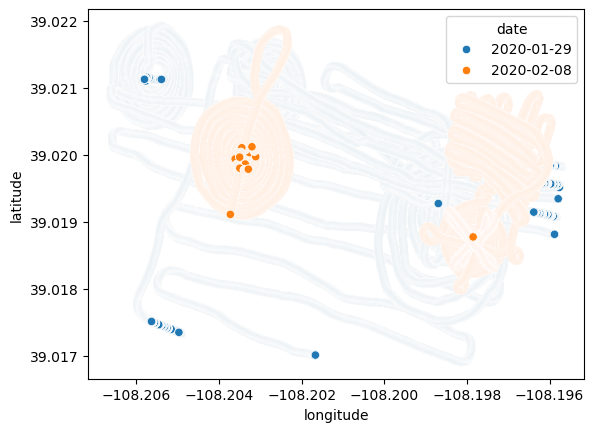

In [18]:
import seaborn as sns
sns.scatterplot(y = 'latitude', x = 'longitude', hue = 'date', data = df)

# Get ASO SWE

In [1]:
# import in the raster measurments class
from snowexsql.api import RasterMeasurements
from datetime import datetime 
from rasterio.plot import show
# Grab available dates
dates = RasterMeasurements.from_unique_entries(["date"], observers='ASO Inc.', type='swe') # depth
dt = dates[0]
dates


[datetime.date(2020, 2, 2), datetime.date(2020, 2, 13)]

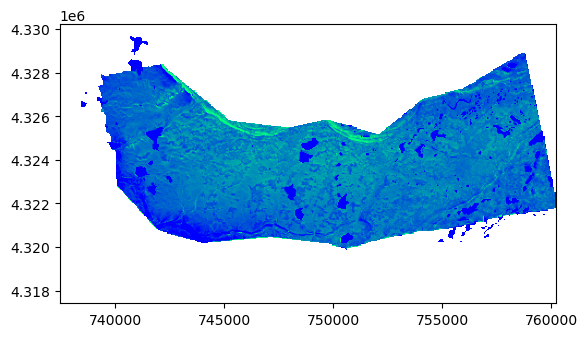

(50.000101089121436, 50.000101089121436)

In [7]:
# Pick a date
dt = datetime(2020, 2, 13)
dt = datetime(2020, 2, 2)

# Query db filtering to swe on a certain date surveyed by ASO
ds = RasterMeasurements.from_filter(observers='ASO Inc.', date = dt, type='swe')
# Plot it up!
show(ds[0], vmin=0.1, vmax=0.4, cmap='winter')

# Note the resolution!
ds[0].res